In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [5]:
os.getcwd()

'C:\\code\\Uni\\ba\\notebooks'

In [47]:
# Opening JSON file 
f = open('metrics/rf_storage.json') 
g = open('metrics/lr_storage.json')  
# returns JSON object as  
# a dictionary 
rf_data = json.load(f)
lr_data = json.load(g)
f.close()
g.close()

In [48]:
rf_df = pd.DataFrame.from_dict(rf_data)

In [49]:
l = []
for i in range(5):
    for _ in range(5):
        l.append(i)
rf_df.insert(0, "Fold", l)

In [9]:
rf_df.head()

,Fold,acc,b_acc,sensitivity,ppv,fpr,tpr,auc
0,0,0.767857,0.737154,0.909091,0.750000,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.030303030303030304, 0.1818181818181818...",0.810277
1,0,0.714286,0.685112,0.848485,0.717949,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.030303030303030304, 0.2121212121212121...",0.805665
2,0,0.732143,0.693676,0.909091,0.714286,"[0.0, 0.0, 0.0, 0.0, 0.08695652173913043, 0.08...","[0.0, 0.030303030303030304, 0.0909090909090909...",0.800395
3,0,0.732143,0.700264,0.878788,0.725000,"[0.0, 0.0, 0.08695652173913043, 0.086956521739...","[0.0, 0.030303030303030304, 0.0303030303030303...",0.739130
4,0,0.714286,0.691700,0.818182,0.729730,"[0.0, 0.0, 0.043478260869565216, 0.04347826086...","[0.0, 0.030303030303030304, 0.0303030303030303...",0.760211


Text(0.5, 1.0, 'Logistic Regression')

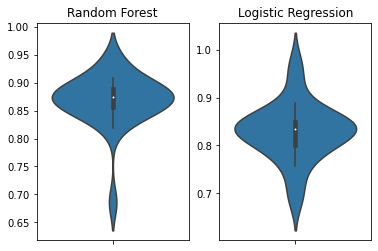

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.violinplot(y=rf_data['sensitivity'], ax=axes[0])
axes[0].set_title("Random Forest")
sns.violinplot(y=lr_data['sensitivity'], ax=axes[1])
axes[1].set_title("Logistic Regression")

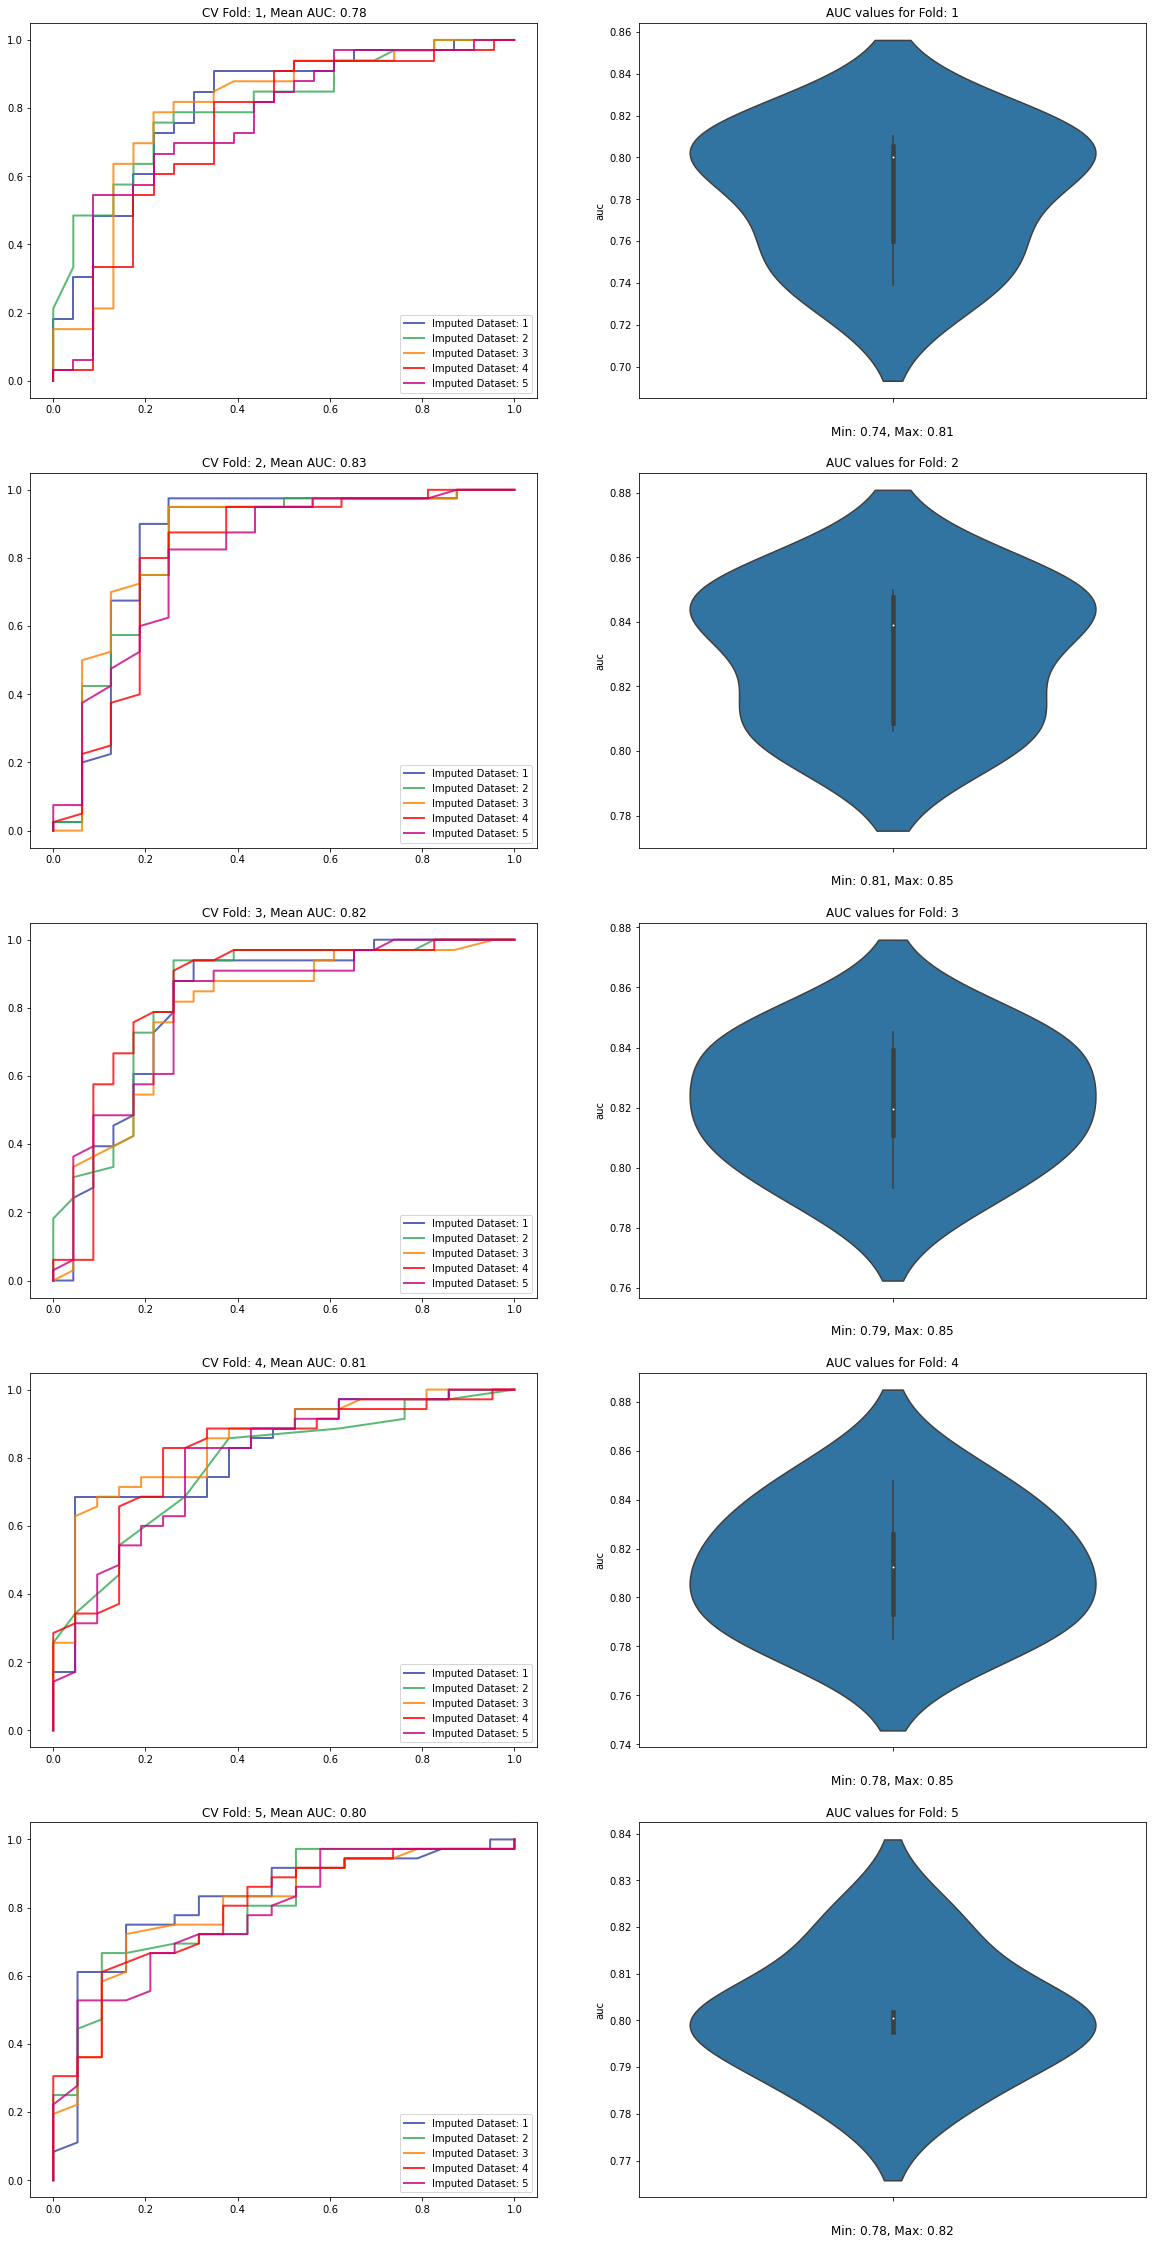

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
col_dict = {0:'#3141a8', 1:'#32a852', 2:'#fa8100', 3:'#fa0000', 4:'#c70081'}
for i in range(rf_df.shape[0]):
    axes[i//5,0].plot(rf_df.iloc[i].fpr, rf_df.iloc[i].tpr, color=col_dict[i%5],
        lw=2, alpha=.8, label=r'Imputed Dataset: %d' % (i%5+1))
    axes[i//5,0].legend(loc="lower right")
for i in range(5):
    axes[i, 0].set_title(r"CV Fold: %d, Mean AUC: %0.2f" % (i+1, rf_df[rf_df["Fold"] == i]["auc"].mean()))
    sns.violinplot(y = rf_df[rf_df["Fold"] == i]["auc"], ax = axes[i, 1])
    axes[i, 1].set_title (r"AUC values for Fold: %d" % (i+1))
    axes[i, 1].text(0.5,-0.1, r"Min: %0.2f, Max: %0.2f" % (rf_df[rf_df["Fold"] == i]["auc"].min(), rf_df[rf_df["Fold"] == i]["auc"].max()), size=12, ha="center", 
         transform=axes[i,1].transAxes)
plt.show()
# additional ideas
# mean ROC for every fold and mean AUC for every fold including std

In [3]:
data = pd.read_csv("metrics/storage.csv")
data.head()

,Fold,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.18181818 0.18181818 0...,0.810277,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.851994
1,0,lr,0.750000,0.708827,0.939394,0.478261,0.720930,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.15151515 0.15151515 0...,0.815547,[0.67346939 0.66666667 0.68085106 0.69565217 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.858435
2,0,rf,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.21212121 0.33333333 0...,0.805665,[0.63461538 0.62745098 0.65306122 0.65957447 0...,[1. 0.96969697 0.96969697 0.93939394 0...,0.863843
3,0,lr,0.714286,0.678524,0.878788,0.478261,0.707317,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.27272727 0.27272727 0...,0.836627,[0.66 0.65306122 0.66666667 0.65957447 0...,[1. 0.96969697 0.96969697 0.93939394 0...,0.887491
4,0,rf,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0. 0...,[0. 0.03030303 0.09090909 0.15151515 0...,0.800395,[0.63461538 0.62745098 0.64 0.65306122 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.827009


In [11]:
data[(data["Fold"]== 0) & (data["Model"]=="rf")]

,Fold,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.18181818 0.18181818 0...,0.810277,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.851994
2,0,rf,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.21212121 0.33333333 0...,0.805665,[0.63461538 0.62745098 0.65306122 0.65957447 0...,[1. 0.96969697 0.96969697 0.93939394 0...,0.863843
4,0,rf,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0. 0...,[0. 0.03030303 0.09090909 0.15151515 0...,0.800395,[0.63461538 0.62745098 0.64 0.65306122 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.827009
6,0,rf,0.732143,0.700264,0.878788,0.521739,0.725000,[0. 0. 0.08695652 0.08695652 0...,[0. 0.03030303 0.03030303 0.33333333 0...,0.739130,[0.6 0.59259259 0.60377358 0.61538462 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.752704
8,0,rf,0.714286,0.691700,0.818182,0.565217,0.729730,[0. 0. 0.04347826 0.04347826 0...,[0. 0.03030303 0.03030303 0.06060606 0...,0.760211,[0.61111111 0.60377358 0.61538462 0.62745098 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.780830


In [31]:
dash = '-' * 90
print(dash)
print('{:<10s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
print(dash)
for model in ['rf', 'lr']:
    tmp = []
    for i in range(5):
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].mean())
    tmp.append(data[data["Model"] == model]["sensitivity"].mean())
    print('{:<10s}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}'.format(model,tmp[0],tmp[1],tmp[2], tmp[3], tmp[4], tmp[5]))

------------------------------------------------------------------------------------------
Model     Fold 1      Fold 2      Fold 3      Fold 4      Fold 5      Combined    
------------------------------------------------------------------------------------------
rf        0.87        0.88        0.90        0.83        0.87        0.87        
lr        0.87        0.84        0.81        0.75        0.87        0.83        


In [46]:
dash = '-' * 90
print(dash)
print('{:<10s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
print(dash)
for model in ['rf', 'lr']:
    tmp = []
    for i in range(5):
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].std())
    tmp.append(data[data["Model"] == model]["sensitivity"].std())
    print('{:<10s}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}'.format(model,tmp[0],0.62,tmp[1],tmp[2], tmp[3], tmp[4], tmp[5]))

------------------------------------------------------------------------------------------
Model     Fold 1      Fold 2      Fold 3      Fold 4      Fold 5      Combined    
------------------------------------------------------------------------------------------
rf        0.04        0.62        0.02        0.04        0.08        0.02        
lr        0.04        0.62        0.01        0.03        0.05        0.06        


In [37]:
def print_summary(data, metric):
    dash = '-' * 90
    print(dash)
    print('{:<10s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}{:<12s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
    print(dash)
    for model in ['rf', 'lr']:
        tmp = []
        for i in range(5):
            tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)][metric].mean())
        tmp.append(data[data["Model"] == model][metric].mean())
        print('{:<10s}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}{:<12.2f}'.format(model,tmp[0],tmp[1],tmp[2], tmp[3], tmp[4], tmp[5]))

In [38]:
print_summary(data, "ppv")

------------------------------------------------------------------------------------------
Model     Fold 1      Fold 2      Fold 3      Fold 4      Fold 5      Combined    
------------------------------------------------------------------------------------------
rf        0.73        0.89        0.82        0.79        0.77        0.80        
lr        0.70        0.88        0.76        0.76        0.76        0.77        


In [48]:
def preprocess_col(col):
    t = col.strip("[]").split(" ")
    t = [x for x in t if x]
    t = [x.strip('\n') for x in t]
    t = [float(x) for x in t]
    return np.array(t)

In [51]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'fpr'])
    tmp.append(tm)
data['fpr'] = pd.Series(tmp)

In [57]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'tpr'])
    tmp.append(tm)
data['tpr'] = pd.Series(tmp)